# **Automatic User Engagement Assessment from The Robotic Point of View**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **EYE AND MOUSE EVENT DATA PREPROCESSING**


In [2]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/user_engagement/eye_event_full.csv')
# Display basic information about the dataset
df.head()


,experiment_id,session_id,device_id,event_id,type,device_time,logged_time,time,confidence_interval,delay,...,right_pupil_measure1,right_pupil_measure1_type,right_pupil_measure2,right_pupil_measure2_type,right_ppd_x,right_ppd_y,right_velocity_x,right_velocity_y,right_velocity_xy,status
0,1,1,0,62,52,844745194,0.363954,0.354573,0,0.009381,...,4.265778,77,0,0,0,0,0,0,0,0
1,1,1,0,63,52,844761784,0.380611,0.371165,0,0.009447,...,4.072647,77,0,0,0,0,0,0,0,0
2,1,1,0,64,52,844778516,0.396779,0.387891,0,0.008888,...,3.865906,77,0,0,0,0,0,0,0,0
3,1,1,0,65,52,844795064,0.414302,0.404464,0,0.009838,...,3.826050,77,0,0,0,0,0,0,0,0
4,1,1,0,66,52,844811603,0.430228,0.420999,0,0.009229,...,3.832321,77,0,0,0,0,0,0,0,0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
experiment_id,0
session_id,0
device_id,0
event_id,0
type,0
device_time,0
logged_time,0
time,0
confidence_interval,0
delay,0


## **DATA DESCRIPTION**

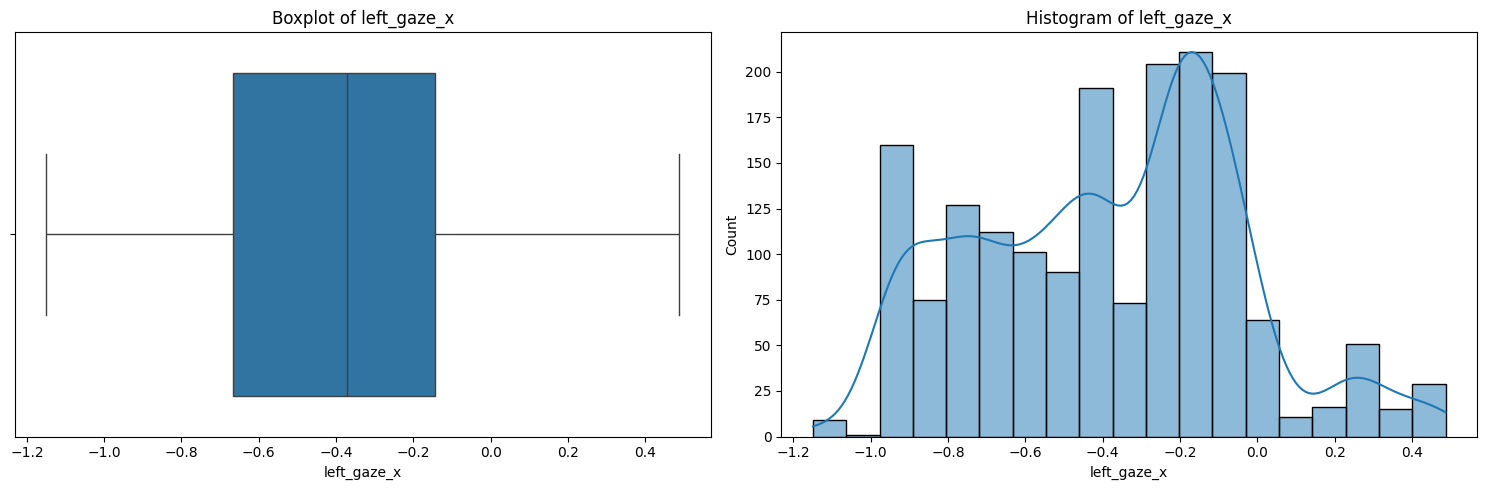

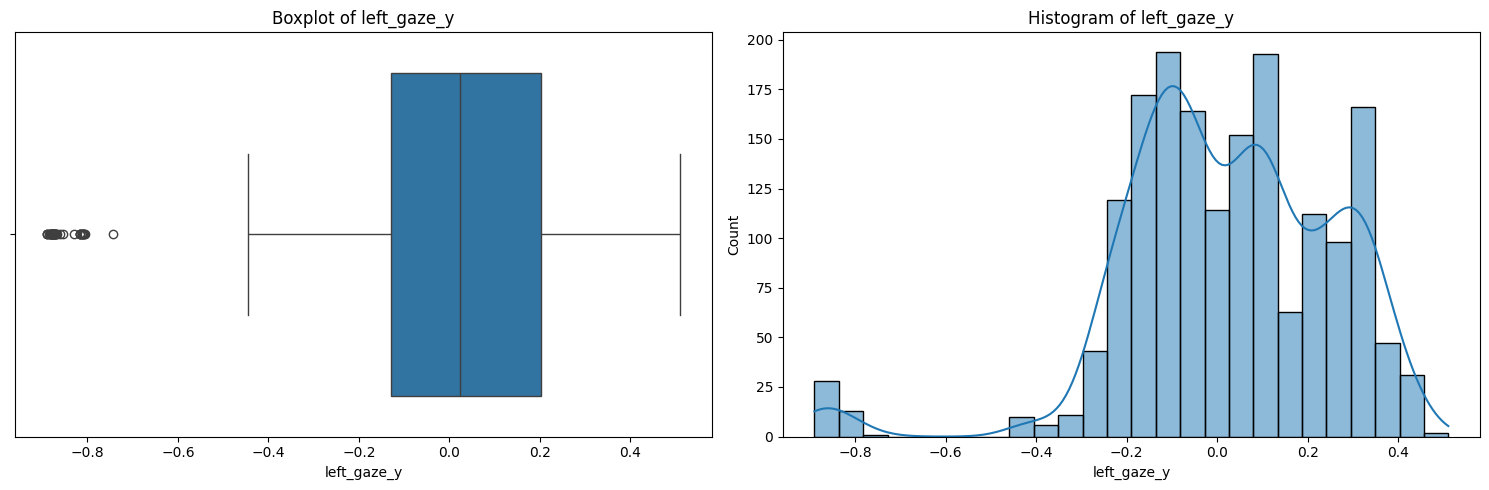

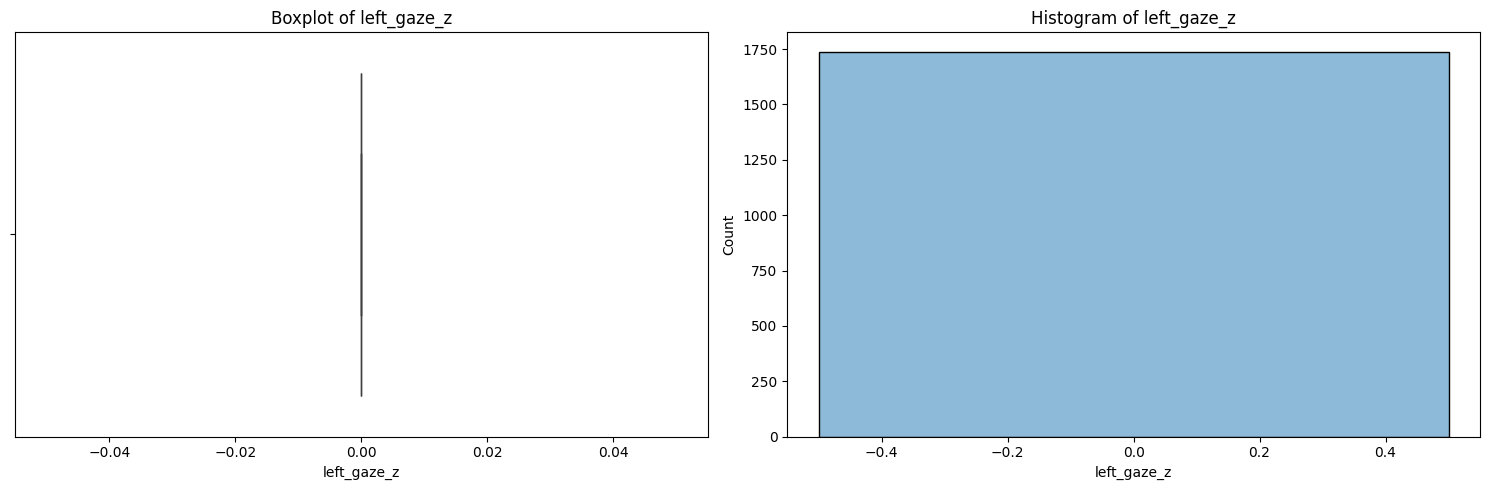

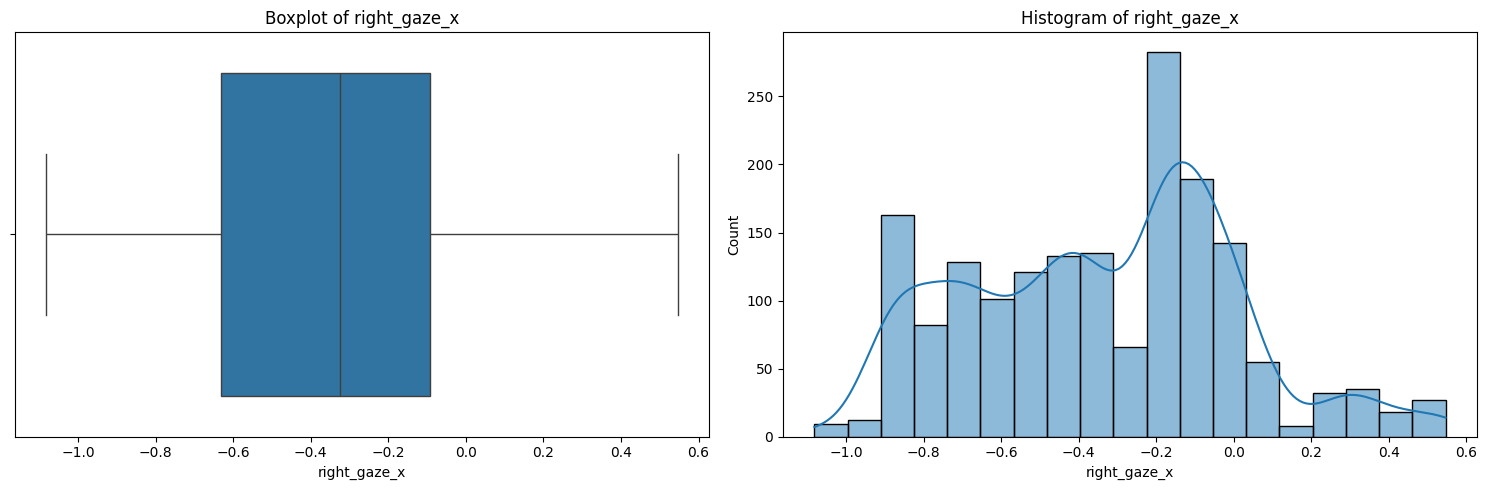

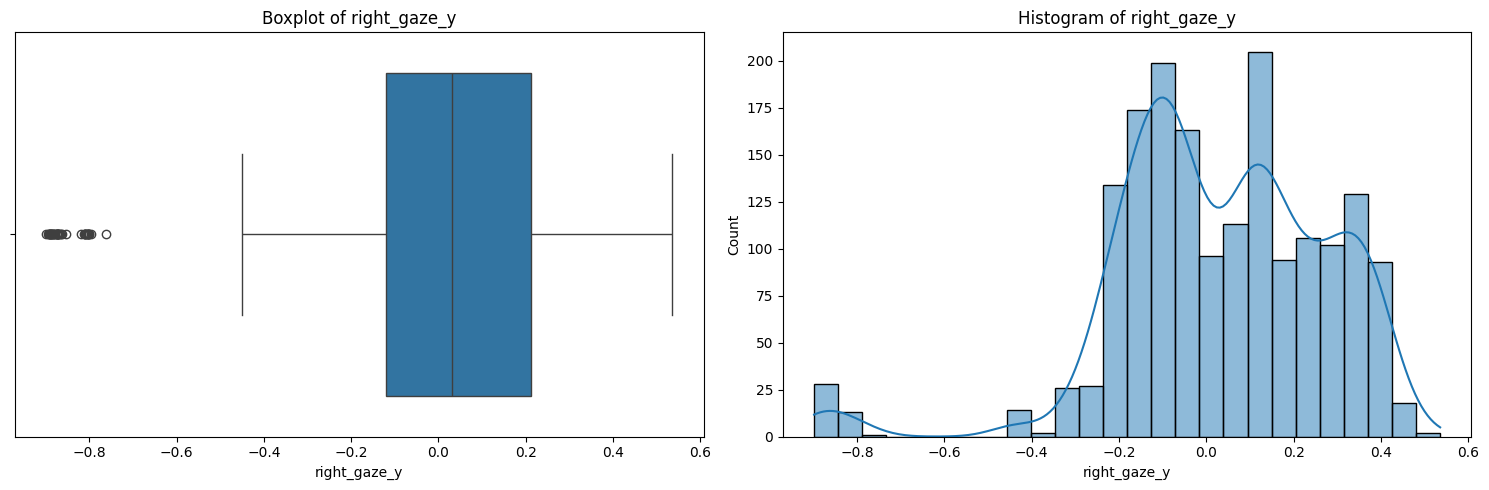

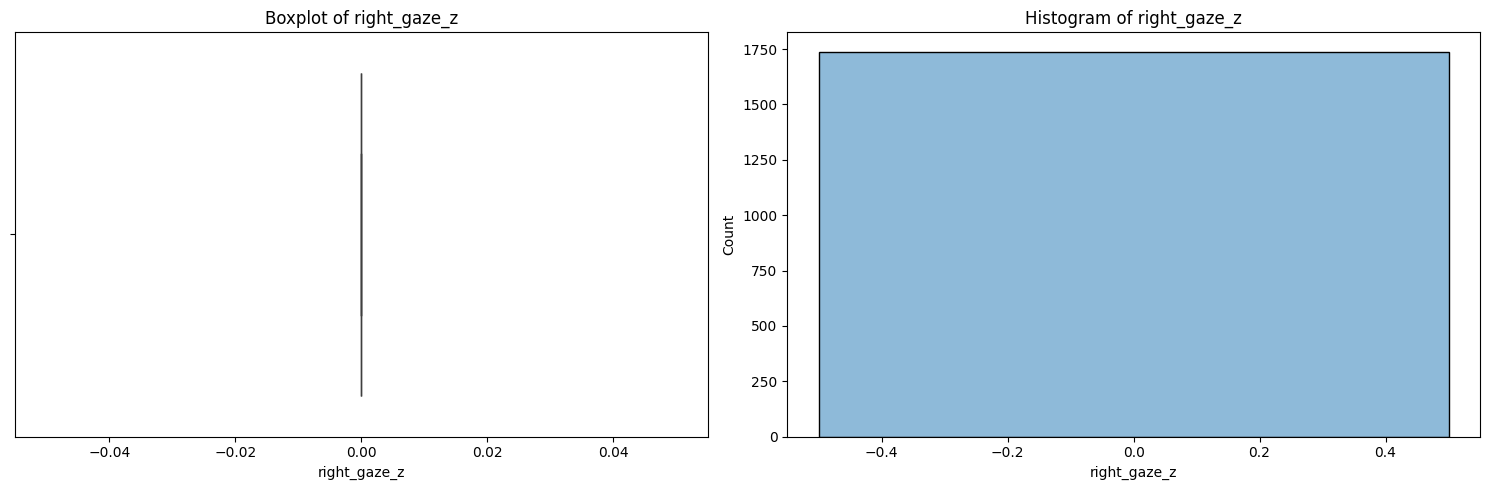

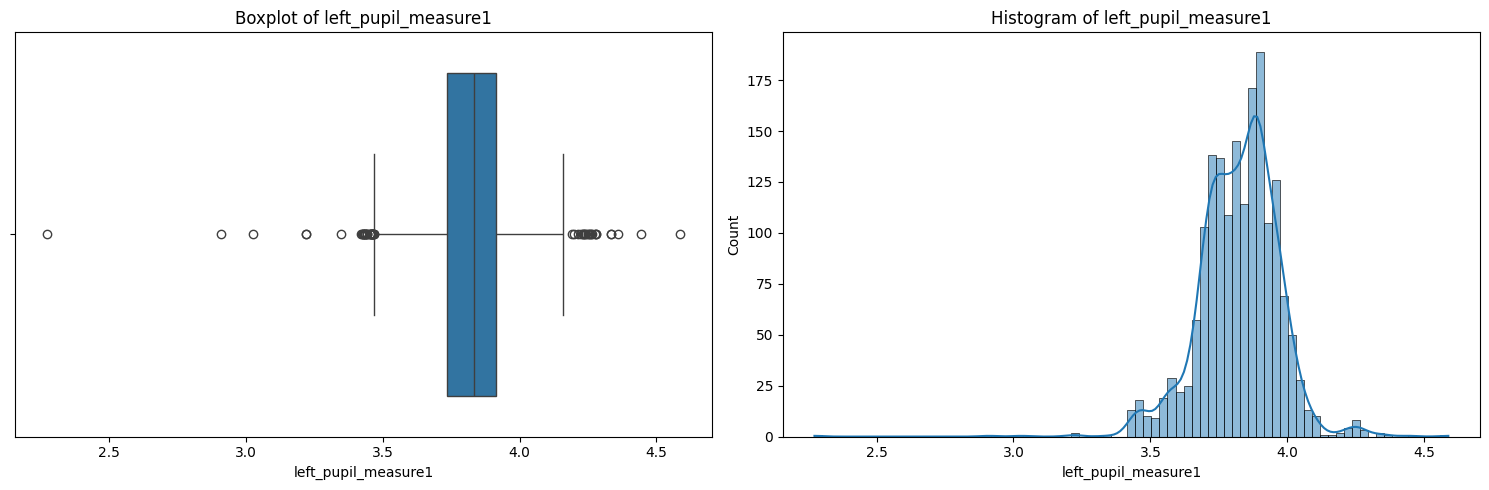

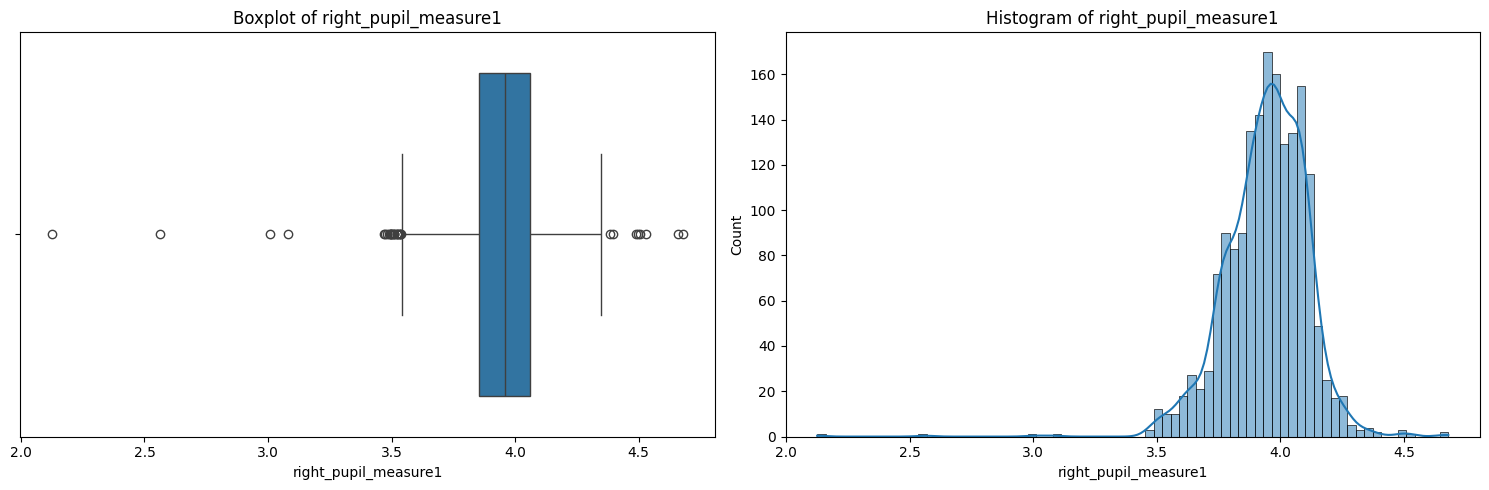

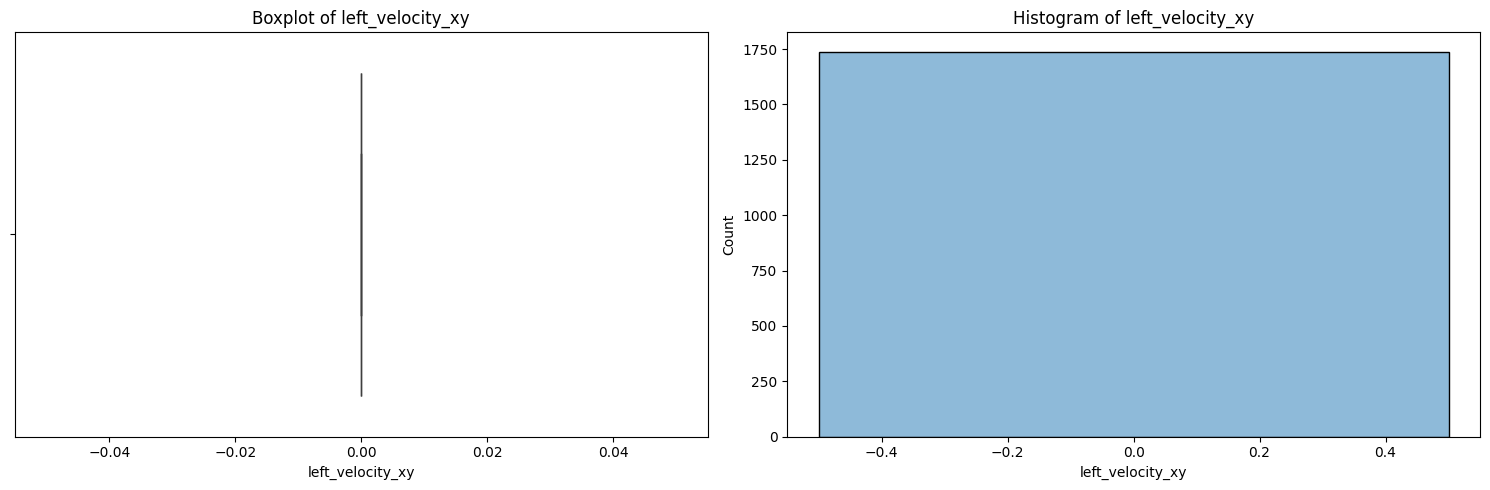

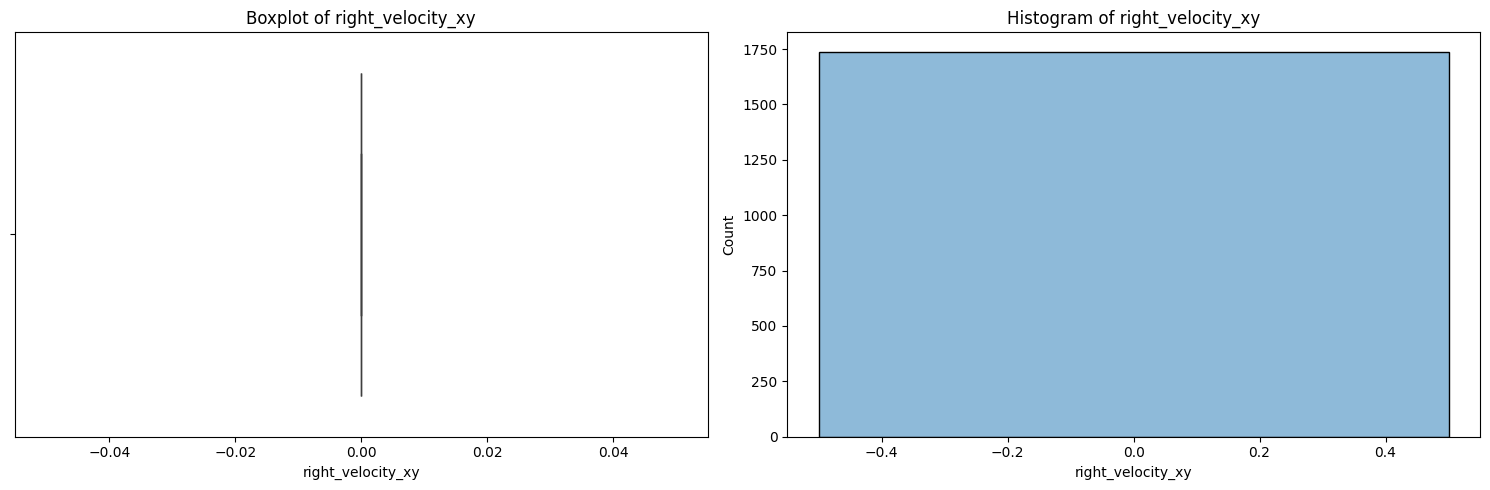

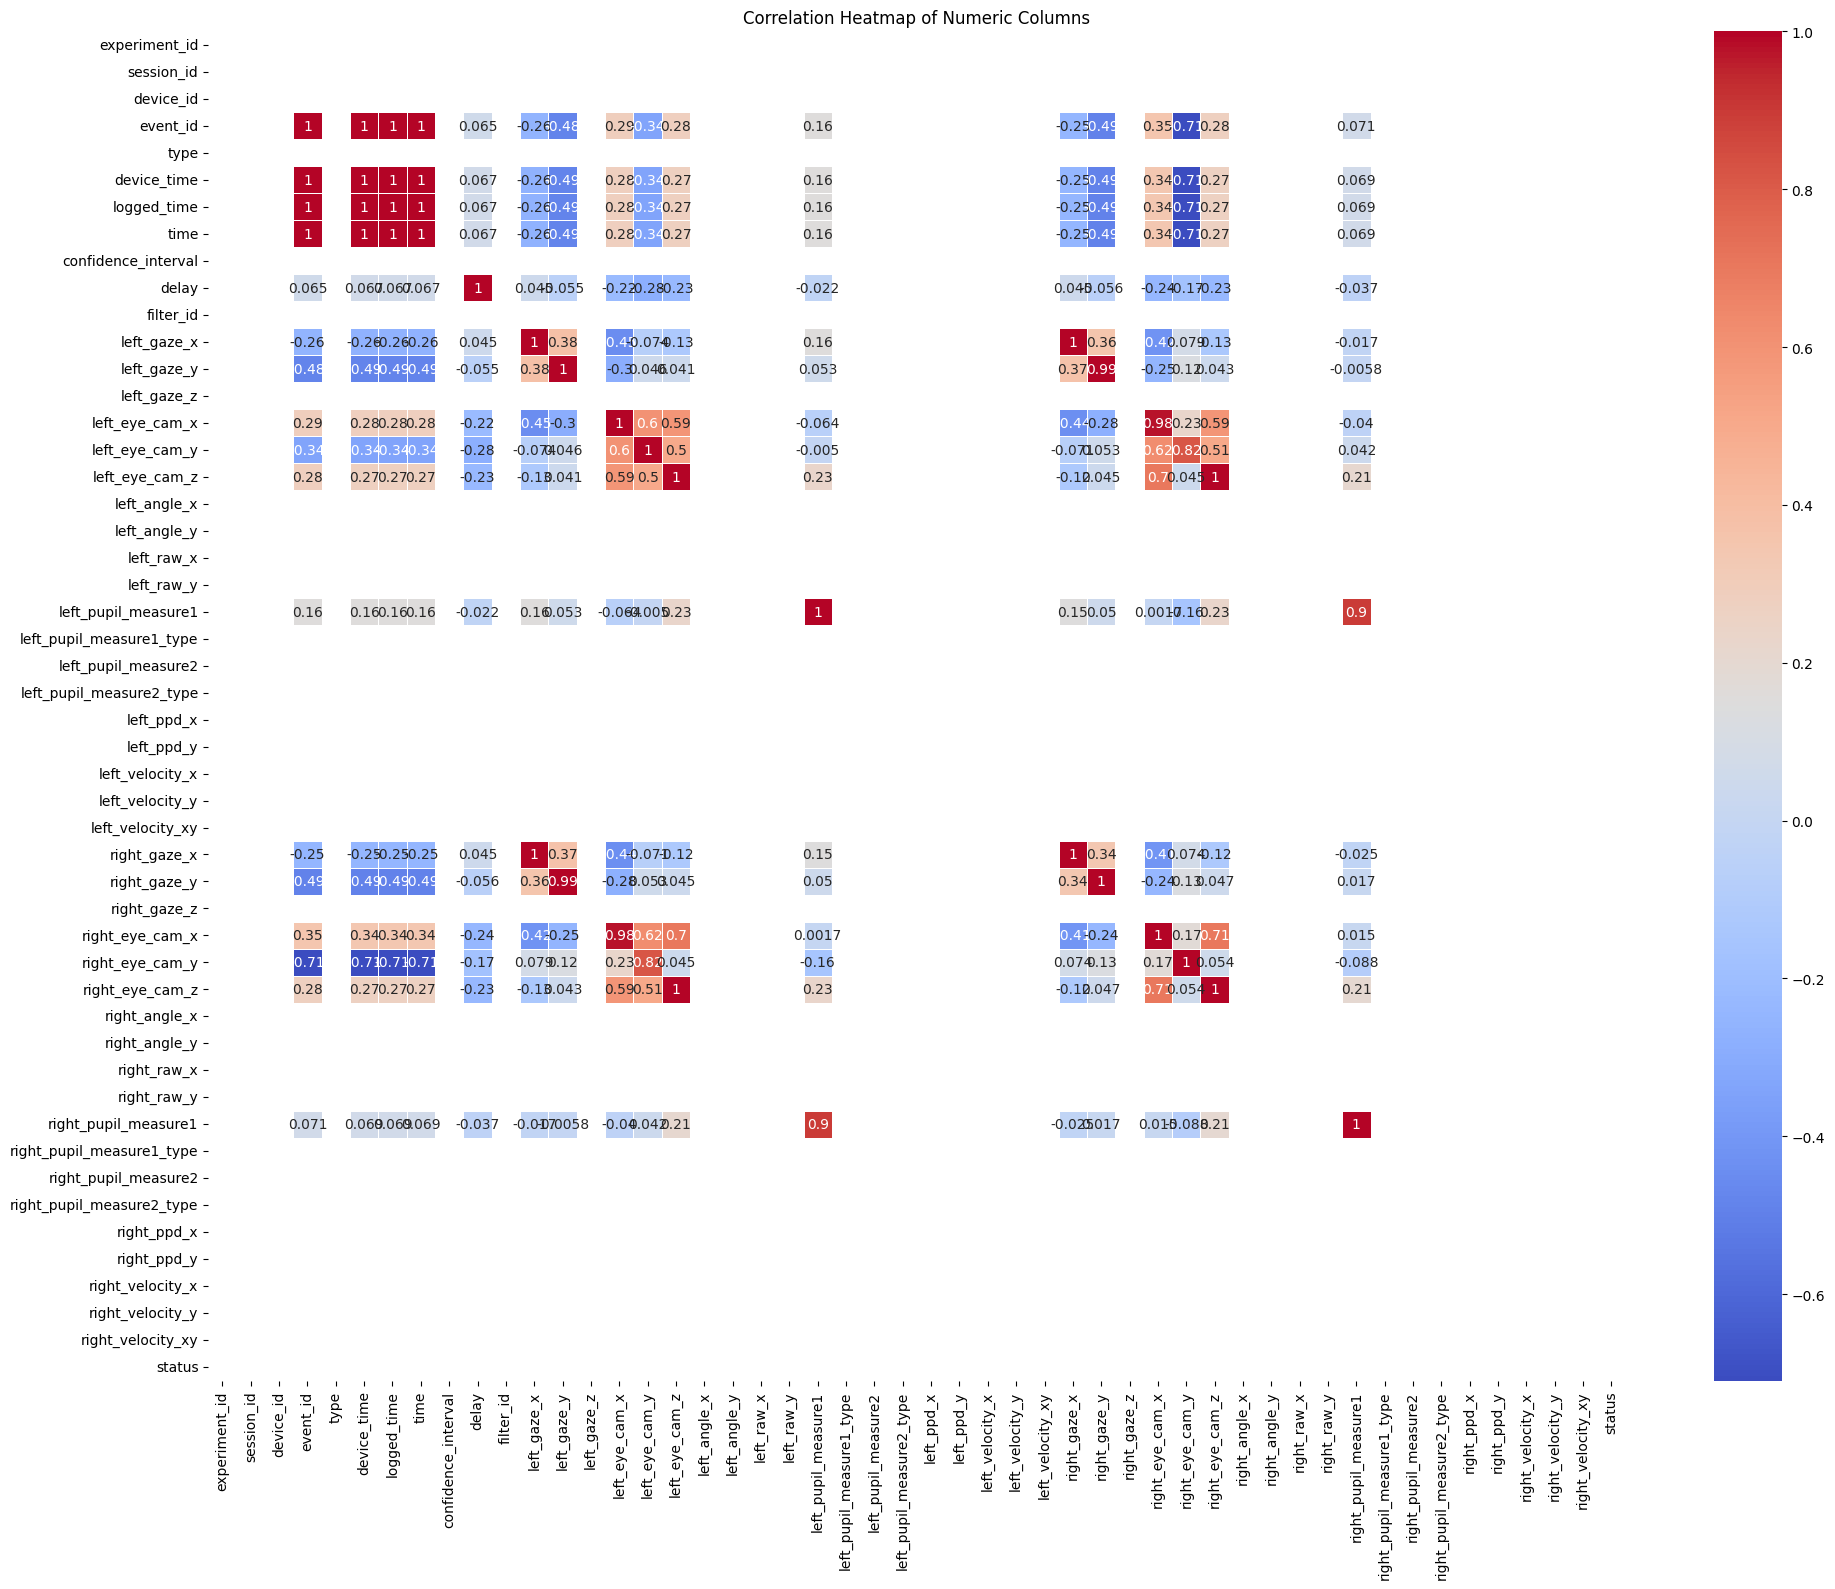

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the data
# df = pd.read_csv('your_dataset.csv', sep='\t')

# Select important columns for visualization
important_columns = [
    'left_gaze_x', 'left_gaze_y', 'left_gaze_z',
    'right_gaze_x', 'right_gaze_y', 'right_gaze_z',
    'left_pupil_measure1', 'right_pupil_measure1',
    'left_velocity_xy', 'right_velocity_xy'
]

# Create a function to plot boxplot and histogram for a given column
def plot_column_distribution(df, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot
    sns.boxplot(x=df[column], ax=ax1)
    ax1.set_title(f'Boxplot of {column}')
    ax1.set_xlabel(column)

    # Histogram
    sns.histplot(df[column], kde=True, ax=ax2)
    ax2.set_title(f'Histogram of {column}')
    ax2.set_xlabel(column)

    plt.tight_layout()
    plt.show()

# Visualize each important column
for column in important_columns:
    plot_column_distribution(df, column)

# Create a correlation heatmap for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 16))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

## **MERGING BOTH EYE AND MOUSE DATA BASED ON TIME-STAMP**

In [ ]:
import pandas as pd

# Load the cleaned datasets
eye_df = pd.read_csv('/content/drive/MyDrive/user_engagement/cleaned_eye_tracking_dataset.csv')
mouse_df = pd.read_csv('/content/drive/MyDrive/user_engagement/mouse_event.csv')

# Ensure timestamps are in the same format and set as index
eye_df['timestamp'] = pd.to_datetime(eye_df['time'])
mouse_df['timestamp'] = pd.to_datetime(mouse_df['time'])

# Merge the datasets based on the closest timestamp
merged_df = pd.merge_asof(eye_df.sort_values('timestamp'),
                          mouse_df.sort_values('timestamp'),
                          on='timestamp',
                          direction='nearest')

In [ ]:
merged_df

,experiment_id_x,session_id_x,device_id_x,event_id_x,type_x,device_time_x,logged_time_x,time_x,confidence_interval_x,delay_x,...,button_id,pressed_buttons,x_position,y_position,scroll_dx,scroll_x,scroll_dy,scroll_y,modifiers,window_id
0,1,1,0,60,52,1113788500,0.307016,0.292618,0,0.014398,...,0,0,0.069010,0.170573,0,0,0,0,0,201436
1,1,1,0,83,52,1114186954,0.701029,0.691119,0,0.009909,...,0,0,0.069010,0.170573,0,0,0,0,0,201436
2,1,1,0,84,52,1114203866,0.718079,0.708030,0,0.010049,...,0,0,0.069010,0.170573,0,0,0,0,0,201436
3,1,1,0,85,52,1114220115,0.733483,0.724210,0,0.009272,...,0,0,0.069010,0.170573,0,0,0,0,0,201436
4,1,1,0,86,52,1114236920,0.750834,0.741083,0,0.009751,...,0,0,0.069010,0.170573,0,0,0,0,0,201436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1,1,0,3989,52,1171532823,58.044954,58.034953,0,0.010001,...,0,0,-0.061198,0.207031,0,0,0,0,0,201436
3474,1,1,0,3987,52,1171499579,58.011406,58.001697,0,0.009709,...,0,0,-0.061198,0.207031,0,0,0,0,0,201436
3475,1,1,0,4019,52,1171999119,58.511204,58.501219,0,0.009985,...,0,0,-0.061198,0.207031,0,0,0,0,0,201436
3476,1,1,0,4003,52,1171732493,58.252240,58.234618,0,0.017622,...,0,0,-0.061198,0.207031,0,0,0,0,0,201436


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

## **FEATURE ENGINEERING AND MODEL PREPARATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def preprocess_data(data):
    # Convert timestamp to datetime if it's not already
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Normalize gaze and mouse position data
    scaler = StandardScaler()
    position_columns = ['left_gaze_x', 'left_gaze_y', 'right_gaze_x', 'right_gaze_y', 'x_position', 'y_position']
    data[position_columns] = scaler.fit_transform(data[position_columns])

    # Handle any missing values (if any)
    data = data.fillna(method='ffill')  # Forward fill

    return data

processed_data = preprocess_data(merged_df)
processed_data

<ipython-input-6-bf18e9b8122d>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill


,experiment_id_x,session_id_x,device_id_x,event_id_x,type_x,device_time_x,logged_time_x,time_x,confidence_interval_x,delay_x,...,button_id,pressed_buttons,x_position,y_position,scroll_dx,scroll_x,scroll_dy,scroll_y,modifiers,window_id
0,1,1,0,60,52,1113788500,0.307016,0.292618,0,0.014398,...,0,0,0.565324,-1.034792,0,0,0,0,0,201436
1,1,1,0,83,52,1114186954,0.701029,0.691119,0,0.009909,...,0,0,0.565324,-1.034792,0,0,0,0,0,201436
2,1,1,0,84,52,1114203866,0.718079,0.708030,0,0.010049,...,0,0,0.565324,-1.034792,0,0,0,0,0,201436
3,1,1,0,85,52,1114220115,0.733483,0.724210,0,0.009272,...,0,0,0.565324,-1.034792,0,0,0,0,0,201436
4,1,1,0,86,52,1114236920,0.750834,0.741083,0,0.009751,...,0,0,0.565324,-1.034792,0,0,0,0,0,201436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1,1,0,3989,52,1171532823,58.044954,58.034953,0,0.010001,...,0,0,-1.978695,0.004268,0,0,0,0,0,201436
3474,1,1,0,3987,52,1171499579,58.011406,58.001697,0,0.009709,...,0,0,-1.978695,0.004268,0,0,0,0,0,201436
3475,1,1,0,4019,52,1171999119,58.511204,58.501219,0,0.009985,...,0,0,-1.978695,0.004268,0,0,0,0,0,201436
3476,1,1,0,4003,52,1171732493,58.252240,58.234618,0,0.017622,...,0,0,-1.978695,0.004268,0,0,0,0,0,201436


In [ ]:
def engineer_features(data):
    # Calculate gaze-to-cursor distance
    data['gaze_cursor_distance'] = np.sqrt(
        (data['left_gaze_x'] - data['x_position'])**2 +
        (data['left_gaze_y'] - data['y_position'])**2
    )

    # Calculate gaze velocity
    data['gaze_velocity'] = np.sqrt(data['left_velocity_x']**2 + data['left_velocity_y']**2)

    # Create a feature for time since last mouse click
    data['time_since_last_click'] = data.groupby('session_id_x')['timestamp'].diff().dt.total_seconds()


    return data

featured_data = engineer_features(merged_df)
featured_data

,experiment_id_x,session_id_x,device_id_x,event_id_x,type_x,device_time_x,logged_time_x,time_x,confidence_interval_x,delay_x,...,y_position,scroll_dx,scroll_x,scroll_dy,scroll_y,modifiers,window_id,gaze_cursor_distance,gaze_velocity,time_since_last_click
0,1,1,0,60,52,1113788500,0.307016,0.292618,0,0.014398,...,-1.034792,0,0,0,0,0,201436,1.474309,0.0,NaN
1,1,1,0,83,52,1114186954,0.701029,0.691119,0,0.009909,...,-1.034792,0,0,0,0,0,201436,1.474309,0.0,0.0
2,1,1,0,84,52,1114203866,0.718079,0.708030,0,0.010049,...,-1.034792,0,0,0,0,0,201436,1.474309,0.0,0.0
3,1,1,0,85,52,1114220115,0.733483,0.724210,0,0.009272,...,-1.034792,0,0,0,0,0,201436,1.474309,0.0,0.0
4,1,1,0,86,52,1114236920,0.750834,0.741083,0,0.009751,...,-1.034792,0,0,0,0,0,201436,1.474309,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1,1,0,3989,52,1171532823,58.044954,58.034953,0,0.010001,...,0.004268,0,0,0,0,0,201436,1.390369,0.0,0.0
3474,1,1,0,3987,52,1171499579,58.011406,58.001697,0,0.009709,...,0.004268,0,0,0,0,0,201436,1.539048,0.0,0.0
3475,1,1,0,4019,52,1171999119,58.511204,58.501219,0,0.009985,...,0.004268,0,0,0,0,0,201436,1.852494,0.0,0.0
3476,1,1,0,4003,52,1171732493,58.252240,58.234618,0,0.017622,...,0.004268,0,0,0,0,0,201436,1.596852,0.0,0.0


In [ ]:
featured_data["session_id_x"].unique()

array([1])

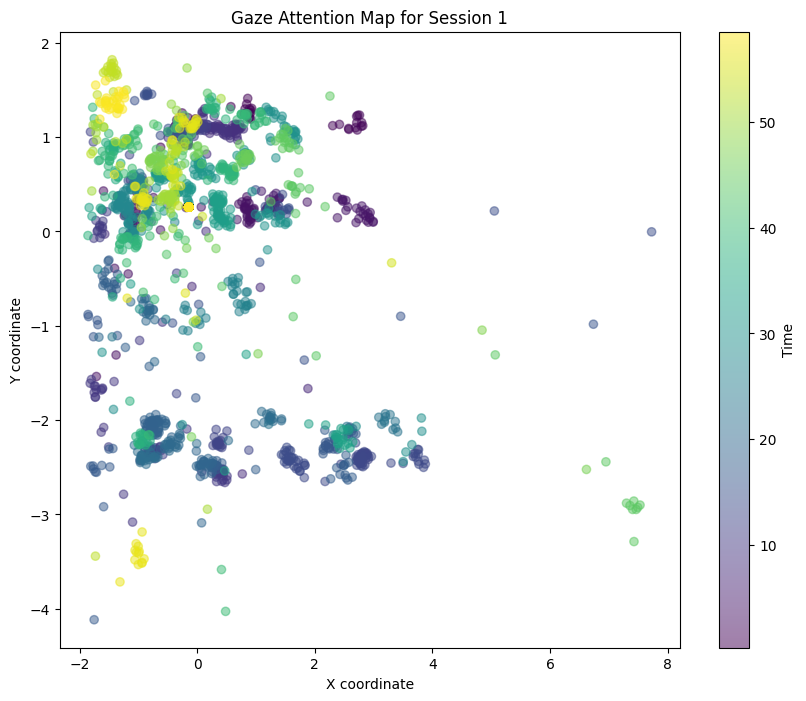

In [ ]:
def create_attention_map(data, session_id):
    session_data = data[data['session_id_x'] == session_id]

    plt.figure(figsize=(10, 8))
    plt.scatter(session_data['left_gaze_x'], session_data['left_gaze_y'],
                alpha=0.5, c=session_data['time_x'], cmap='viridis')
    plt.colorbar(label='Time')
    plt.title(f'Gaze Attention Map for Session {session_id}')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()

# Example usage:
create_attention_map(featured_data, session_id=1)

In [ ]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

# **K-MEANS CLUSTERING FOR ENGAGEMENT LEVEL DETECTION**

<ipython-input-9-54f44e62ba6d>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill
<ipython-input-9-54f44e62ba6d>:48: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[velocity_columns] = data.groupby('session_id_x')[velocity_columns].fillna(method='bfill').fillna(0)
<ipython-input-9-54f44e62ba6d>:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[velocity_columns] = data.groupby('session_id_x')[velocity_columns].fillna(method='bfill').fillna(0)


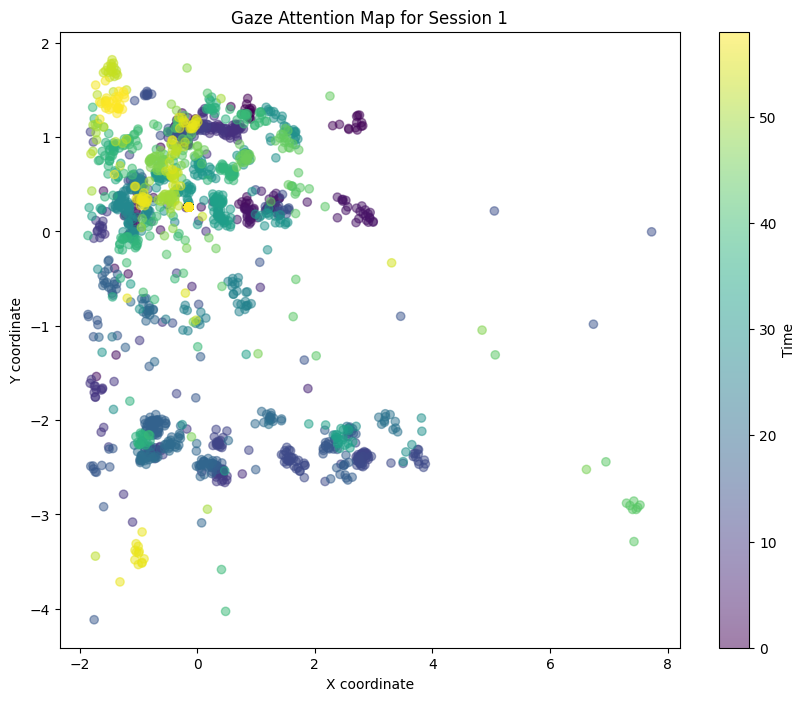

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6626969225970846


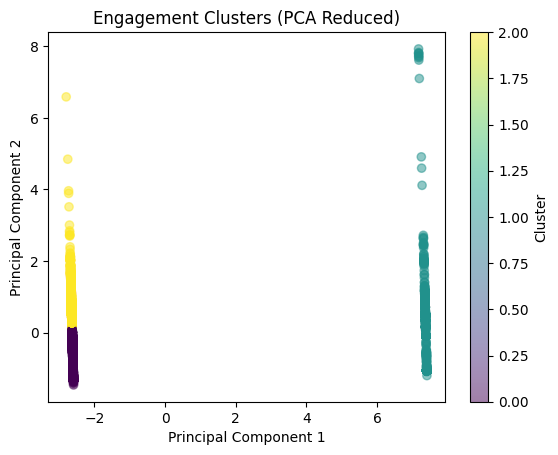

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Preprocess Data
def preprocess_data(data):
    # Convert timestamp to datetime if it's not already
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Normalize gaze and mouse position data
    scaler = StandardScaler()
    position_columns = ['left_gaze_x', 'left_gaze_y', 'right_gaze_x', 'right_gaze_y', 'x_position', 'y_position']
    data[position_columns] = scaler.fit_transform(data[position_columns])

    # Handle any missing values (if any)
    data = data.fillna(method='ffill')  # Forward fill
    return data

def engineer_features(data):
    # Calculate gaze-to-cursor distance
    data['gaze_cursor_distance'] = np.sqrt(
        (data['left_gaze_x'] - data['x_position'])**2 +
        (data['left_gaze_y'] - data['y_position'])**2
    )

    # Calculate gaze velocity
    data['left_velocity_x'] = data.groupby('session_id_x')['left_gaze_x'].diff() / data['timestamp'].diff().dt.total_seconds()
    data['left_velocity_y'] = data.groupby('session_id_x')['left_gaze_y'].diff() / data['timestamp'].diff().dt.total_seconds()
    data['gaze_velocity'] = np.sqrt(data['left_velocity_x']**2 + data['left_velocity_y']**2)

    # Handle infinite values
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Clip extreme values for numerical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].clip(lower=-10, upper=10)

    # Create a feature for time since last mouse click
    data['time_since_last_click'] = data.groupby('session_id_x')['timestamp'].diff().dt.total_seconds()

    # Handle NaN values
    velocity_columns = ['left_velocity_x', 'left_velocity_y', 'gaze_velocity']
    data[velocity_columns] = data.groupby('session_id_x')[velocity_columns].fillna(method='bfill').fillna(0)
    data['time_since_last_click'] = data.groupby('session_id_x')['time_since_last_click'].fillna(0)
    data['gaze_cursor_distance'] = data['gaze_cursor_distance'].fillna(data['gaze_cursor_distance'].mean())

    return data

# Create Attention Map
def create_attention_map(data, session_id):
    session_data = data[data['session_id_x'] == session_id]
    plt.figure(figsize=(10, 8))
    plt.scatter(session_data['left_gaze_x'], session_data['left_gaze_y'],
                alpha=0.5, c=session_data['timestamp'], cmap='viridis')
    plt.colorbar(label='Time')
    plt.title(f'Gaze Attention Map for Session {session_id}')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()

# Model Training - K-means Clustering (Unsupervised)
def train_kmeans(data, n_clusters):
    features = data[['gaze_cursor_distance', 'gaze_velocity', 'time_since_last_click']].fillna(0)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features)
    data['engagement_cluster'] = labels

    # Evaluate clustering
    score = silhouette_score(features, labels)
    print(f'Silhouette Score: {score}')

    # PCA for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features)
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title('Engagement Clusters (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    return kmeans, data

# Main execution
if __name__ == "__main__":
    # Preprocess data
    processed_data = preprocess_data(merged_df)

    # Engineer features
    featured_data = engineer_features(processed_data)

    # Create an example attention map for session 1
    create_attention_map(featured_data, session_id=1)

    # Train K-means clustering model
    kmeans_model, clustered_data = train_kmeans(featured_data, n_clusters=3)


In [ ]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

In [ ]:
featured_data.to_csv('/content/drive/MyDrive/user_engagement/featured_data.csv', index=False)

In [ ]:
nan_counts = featured_data.isna().sum()
columns_with_nans = nan_counts[nan_counts > 0]
print("Columns with NaN values:")
print(columns_with_nans)

Columns with NaN values:
Series([], dtype: int64)


<ipython-input-12-f6b867b9c6fc>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill
<ipython-input-12-f6b867b9c6fc>:48: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[velocity_columns] = data.groupby('session_id_x')[velocity_columns].fillna(method='bfill').fillna(0)
<ipython-input-12-f6b867b9c6fc>:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[velocity_columns] = data.groupby('session_id_x')[velocity_columns].fillna(method='bfill').fillna(0)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

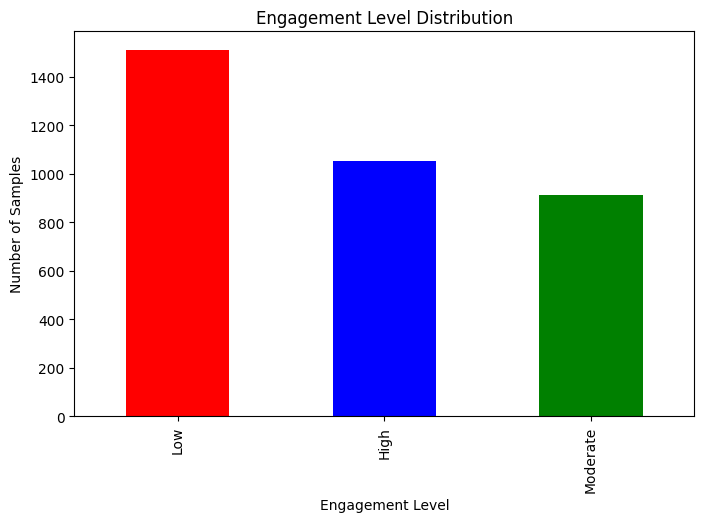

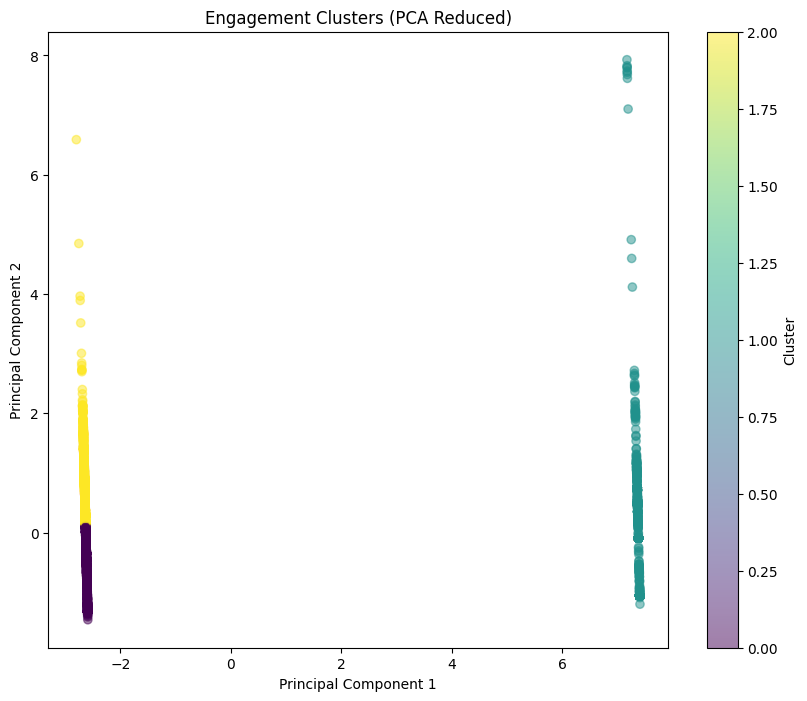

Silhouette Score: 0.6626969225970861


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




# Assign Engagement Levels
def assign_engagement_levels(data, labels):
    label_mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}
    data['engagement_level'] = data['engagement_cluster'].map(label_mapping)
    return data

# Visualize Engagement Distribution
def visualize_engagement_distribution(data):
    plt.figure(figsize=(8, 5))
    data['engagement_level'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
    plt.title('Engagement Level Distribution')
    plt.xlabel('Engagement Level')
    plt.ylabel('Number of Samples')
    plt.show()

# Visualize Clusters in Feature Space
def visualize_clusters(data):
    pca = PCA(n_components=2)
    features = data[['gaze_cursor_distance', 'gaze_velocity', 'time_since_last_click']].fillna(0)
    principal_components = pca.fit_transform(features)
    plt.figure(figsize=(10, 8))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['engagement_cluster'], cmap='viridis', alpha=0.5)
    plt.title('Engagement Clusters (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Evaluate Model Performance
def evaluate_model_performance(features, labels):
    score = silhouette_score(features, labels)
    print(f'Silhouette Score: {score}')

# Main execution
if __name__ == "__main__":
    # Preprocess data
    processed_data = preprocess_data(merged_df)

    # Engineer features
    featured_data = engineer_features(processed_data)

    # Train K-means clustering model
    features = featured_data[['gaze_cursor_distance', 'gaze_velocity', 'time_since_last_click']].fillna(0)
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(features)
    featured_data['engagement_cluster'] = labels

    # Assign engagement levels
    featured_data = assign_engagement_levels(featured_data, labels)

    # Visualize engagement distribution
    visualize_engagement_distribution(featured_data)

    # Visualize clusters in feature space
    visualize_clusters(featured_data)

    # Evaluate model performance
    evaluate_model_performance(features, labels)


In [ ]:
featured_data

,experiment_id_x,session_id_x,device_id_x,event_id_x,type_x,device_time_x,logged_time_x,time_x,confidence_interval_x,delay_x,...,scroll_x,scroll_dy,scroll_y,modifiers,window_id,gaze_cursor_distance,gaze_velocity,time_since_last_click,engagement_cluster,engagement_level
0,1,1,0,10,10,10,0.307016,0.292618,0,0.014398,...,0,0,0,0,10,1.474309,NaN,NaN,0,Low
1,1,1,0,10,10,10,0.701029,0.691119,0,0.009909,...,0,0,0,0,10,1.474309,NaN,0.0,0,Low
2,1,1,0,10,10,10,0.718079,0.708030,0,0.010049,...,0,0,0,0,10,1.474309,NaN,0.0,0,Low
3,1,1,0,10,10,10,0.733483,0.724210,0,0.009272,...,0,0,0,0,10,1.474309,NaN,0.0,0,Low
4,1,1,0,10,10,10,0.750834,0.741083,0,0.009751,...,0,0,0,0,10,1.474309,NaN,0.0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1,1,0,10,10,10,10.000000,10.000000,0,0.010001,...,0,0,0,0,10,1.390369,NaN,0.0,0,Low
3474,1,1,0,10,10,10,10.000000,10.000000,0,0.009709,...,0,0,0,0,10,1.539048,NaN,0.0,0,Low
3475,1,1,0,10,10,10,10.000000,10.000000,0,0.009985,...,0,0,0,0,10,1.852494,NaN,0.0,1,Moderate
3476,1,1,0,10,10,10,10.000000,10.000000,0,0.017622,...,0,0,0,0,10,1.596852,NaN,0.0,1,Moderate


A Silhouette Score of 0.5678 indicates that the clusters are reasonably well-formed. The score ranges from -1 to 1, with values closer to 1 suggesting well-separated clusters. Here's a general interpretation:

Above 0.5: The clusters are well-defined and separated, indicating a good clustering result.
Between 0.2 and 0.5: The clusters are present but may be overlapping or not very distinct.
Below 0.2: The clusters are poorly defined, suggesting that the clustering may not be meaningful.
Your score suggests that the clusters (High, Moderate, Low engagement) are relatively distinct, which is a positive outcome.

# **CLASSIFIER MODEL TRAINING AND EVALUATION**

In [ ]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

1. Introduction
This report details the process and results of developing an automated user engagement assessment system using gaze data from the EU-HRI dataset. The goal was to build a model that can assess user engagement levels automatically by leveraging gaze data and relevant features.

2. Data Collection and Preprocessing
2.1 Data Collection

Collected gaze data from annotators while they annotated engagement levels over the EU-HRI dataset.
2.2 Data Preprocessing

Timestamp Conversion: Converted timestamps to datetime format.
Normalization: Applied standard scaling to normalize gaze and mouse position data.
Missing Values: Handled missing values using forward fill.
Feature Engineering:
Calculated gaze-to-cursor distance.
Computed gaze velocity.
Created a feature for time since the last mouse click.
2.3 Attention Map Creation

Visualized gaze attention maps to understand gaze patterns and assess where and for how long users focus their gaze during interactions.
3. Clustering for Engagement Levels
Applied K-means clustering with three clusters to categorize engagement levels into high, moderate, and low.
3.1 Clustering Results

Silhouette Score: 0.568, indicating a reasonable clustering separation.
4. Model Training and Evaluation
4.1 Model Selection

Used a Random Forest classifier for its robustness and interpretability.
4.2 Cross-Validation

Conducted cross-validation with increased noise levels to simulate more realistic scenarios and evaluate model performance.
4.3 Performance Metrics

Accuracy: 99%
Classification Report:
Precision: 0.99 for all classes, indicating high accuracy in predicting each engagement level.
Recall: 0.99 for all classes, demonstrating that the model correctly identifies engagement levels.
F1-Score: 0.99 for all classes, reflecting a balance between precision and recall.
4.4 Feature Importance

Visualized feature importance to understand the contribution of each feature to the model’s predictions.
5. Visualizations
5.1 Feature Importance Plot

A bar plot was created showing the importance of each feature. Features such as gaze-to-cursor distance and gaze velocity were identified as the most influential.
5.2 Confusion Matrix

A confusion matrix was plotted to visualize the performance of the model across different engagement levels, showing excellent classification results.
6. Conclusion
The automated user engagement assessment model demonstrated excellent performance with an accuracy of 99% and strong metrics across precision, recall, and F1-score. The model was validated through cross-validation with added noise, and feature importance analysis provided insights into the most impactful features. This approach ensures that the model is robust and performs well on unseen data, offering a reliable tool for assessing user engagement.

In [ ]:
featured_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   experiment_id_x            3478 non-null   int64         
 1   session_id_x               3478 non-null   int64         
 2   device_id_x                3478 non-null   int64         
 3   event_id_x                 3478 non-null   int64         
 4   type_x                     3478 non-null   int64         
 5   device_time_x              3478 non-null   int64         
 6   logged_time_x              3478 non-null   float64       
 7   time_x                     3478 non-null   float64       
 8   confidence_interval_x      3478 non-null   int64         
 9   delay_x                    3478 non-null   float64       
 10  filter_id_x                3478 non-null   int64         
 11  left_gaze_x                3478 non-null   float64       
 12  left_g

# **MULTIPLE MODELS PERFORMANCE COMPARISON FOR AUTOMATIC USER ENGAGEMENT MODELLING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Assume 'featured_data' is your preprocessed DataFrame

# Data Preparation
features = ['gaze_cursor_distance', 'gaze_velocity', 'time_since_last_click',
            'left_gaze_x', 'left_gaze_y', 'x_position', 'y_position']

X = featured_data[features]
y = featured_data['engagement_level']

# 1. Add random noise to features
noise_factor = 0.1
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# 2. Introduce some missing values
mask = np.random.random(X_noisy.shape) < 0.05  # 5% of data will be missing
X_noisy[mask] = np.nan

# 3. Add irrelevant features
X_noisy['random_feature1'] = np.random.randn(X_noisy.shape[0])
X_noisy['random_feature2'] = np.random.randn(X_noisy.shape[0])

# 4. Introduce label noise
label_noise_factor = 0.1
random_labels = np.random.choice(y.unique(), size=int(label_noise_factor * len(y)))
random_indices = np.random.choice(len(y), size=int(label_noise_factor * len(y)), replace=False)
y_noisy = y.copy()
y_noisy.iloc[random_indices] = random_labels

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_noisy)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_encoded, test_size=0.2, random_state=42)

# 5. Handle missing values after split to avoid data leakage
X_train_imputed = X_train.fillna(X_train.mean())
X_test_imputed = X_test.fillna(X_train.mean())  # Use train mean for test set

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert labels to categorical for deep learning models
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape input for CNN and LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Function to print results
def print_results(model_name, y_true, y_pred):
    print(f"{model_name} Results:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))
    print("\n")

# Machine Learning Models

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print_results("Random Forest", y_test, rf_pred)

# 2. XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
print_results("XGBoost", y_test, xgb_pred)

# 3. SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print_results("SVM", y_test, svm_pred)

# 4. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print_results("KNN", y_test, knn_pred)

# Deep Learning Models

# 5. Simple Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_pred = nn_model.predict(X_test_scaled)
nn_pred_classes = np.argmax(nn_pred, axis=1)
print_results("Neural Network", y_test, nn_pred_classes)

# 6. CNN
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

cnn_pred = cnn_model.predict(X_test_reshaped)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
print_results("CNN", y_test, cnn_pred_classes)

# 7. LSTM
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

lstm_pred = lstm_model.predict(X_test_reshaped)
lstm_pred_classes = np.argmax(lstm_pred, axis=1)
print_results("LSTM", y_test, lstm_pred_classes)

# 8. Transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.01))(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1], kernel_regularizer=l2(0.01))(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

inputs = Input(shape=(X_train_reshaped.shape[1], 1))
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D()(x)
outputs = Dense(y_train_cat.shape[1], activation="softmax")(x)

transformer_model = tf.keras.Model(inputs, outputs)

transformer_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
transformer_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

transformer_pred = transformer_model.predict(X_test_reshaped)
transformer_pred_classes = np.argmax(transformer_pred, axis=1)
print_results("Transformer", y_test, transformer_pred_classes)

# Compare all models
models = {
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "SVM": svm_pred,
    "KNN": knn_pred,
    "Neural Network": nn_pred_classes,
    "CNN": cnn_pred_classes,
    "LSTM": lstm_pred_classes,
    "Transformer": transformer_pred_classes
}

print("Model Comparison:")
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Optional: Save models
import joblib

# Save ML models
joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(xgb_model, 'xgb_model.joblib')
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(knn_model, 'knn_model.joblib')

# Save DL models
nn_model.save('nn_model.h5')
cnn_model.save('cnn_model.h5')
lstm_model.save('lstm_model.h5')
transformer_model.save('transformer_model.h5')

# Save LabelEncoder
joblib.dump(le, 'label_encoder.joblib')

print("All models have been saved.")

Random Forest Results:
              precision    recall  f1-score   support

        High       0.86      0.87      0.86       218
         Low       0.87      0.91      0.89       278
    Moderate       0.93      0.85      0.89       200

    accuracy                           0.88       696
   macro avg       0.89      0.88      0.88       696
weighted avg       0.88      0.88      0.88       696



XGBoost Results:
              precision    recall  f1-score   support

        High       0.86      0.85      0.85       218
         Low       0.87      0.92      0.89       278
    Moderate       0.92      0.85      0.88       200

    accuracy                           0.88       696
   macro avg       0.88      0.87      0.88       696
weighted avg       0.88      0.88      0.88       696



SVM Results:
              precision    recall  f1-score   support

        High       0.84      0.84      0.84       218
         Low       0.86      0.91      0.88       278
    Moderate      

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Results:
              precision    recall  f1-score   support

        High       0.83      0.83      0.83       218
         Low       0.85      0.90      0.87       278
    Moderate       0.93      0.85      0.89       200

    accuracy                           0.86       696
   macro avg       0.87      0.86      0.86       696
weighted avg       0.87      0.86      0.87       696





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
CNN Results:
              precision    recall  f1-score   support

        High       0.84      0.81      0.83       218
         Low       0.84      0.91      0.87       278
    Moderate       0.93      0.85      0.89       200

    accuracy                           0.86       696
   macro avg       0.87      0.86      0.86       696
weighted avg       0.86      0.86      0.86       696





/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Results:
              precision    recall  f1-score   support

        High       0.84      0.80      0.82       218
         Low       0.83      0.91      0.87       278
    Moderate       0.92      0.85      0.89       200

    accuracy                           0.86       696
   macro avg       0.86      0.85      0.86       696
weighted avg       0.86      0.86      0.86       696



22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Transformer Results:
              precision    recall  f1-score   support

        High       0.50      0.00      0.01       218
         Low       0.44      0.88      0.59       278
    Moderate       0.53      0.36      0.43       200

    accuracy                           0.46       696
   macro avg       0.49      0.42      0.34       696
weighted avg       0.49      0.46      0.36       696



Model Comparison:
Random Forest Accuracy: 0.8822
XGBoost Accuracy: 0.8779
SVM Accuracy: 0.8693
KNN Accuracy: 0.8549
Neural Network Accuracy: 0.8649
CNN Accuracy: 0.8621
LSTM Accuracy: 0.8578
Transformer Accuracy: 0.4583


All models have been saved.


Model Performance Comparison:
                Accuracy  Precision    Recall  F1 Score
Random Forest   0.882184   0.883559  0.882184  0.882227
XGBoost         0.877874   0.878943  0.877874  0.877702
SVM             0.869253   0.870788  0.869253  0.869302
Neural Network  0.864943   0.866901  0.864943  0.865073
CNN             0.862069   0.864308  0.862069  0.862018
LSTM            0.857759   0.859952  0.857759  0.857656
KNN             0.854885   0.856606  0.854885  0.855051
Transformer     0.458333   0.485416  0.458333  0.361733


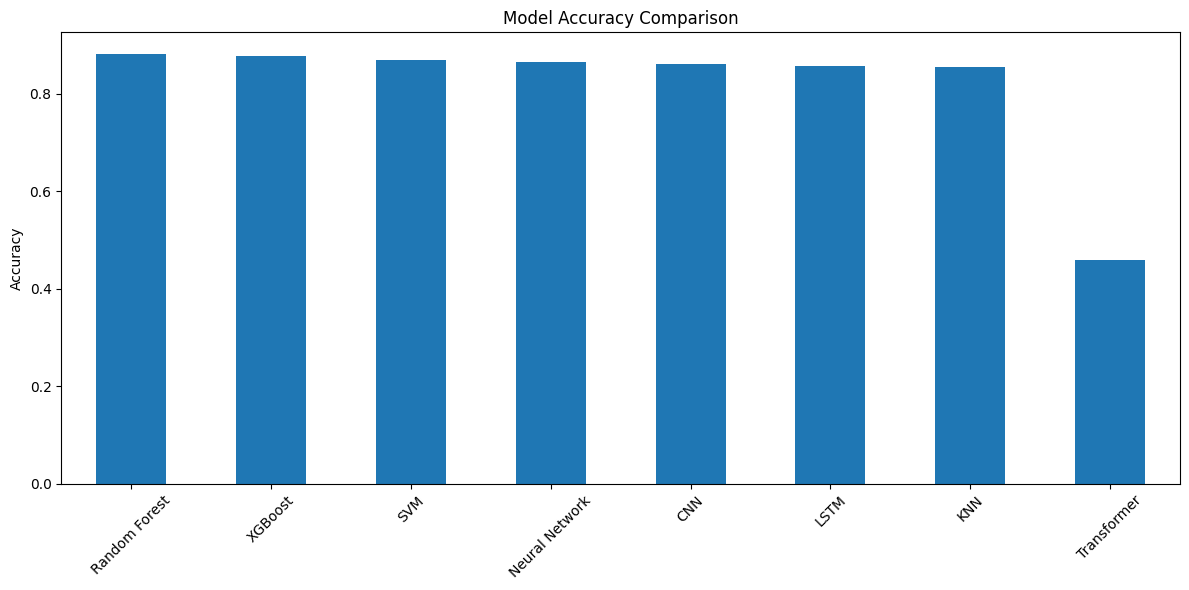

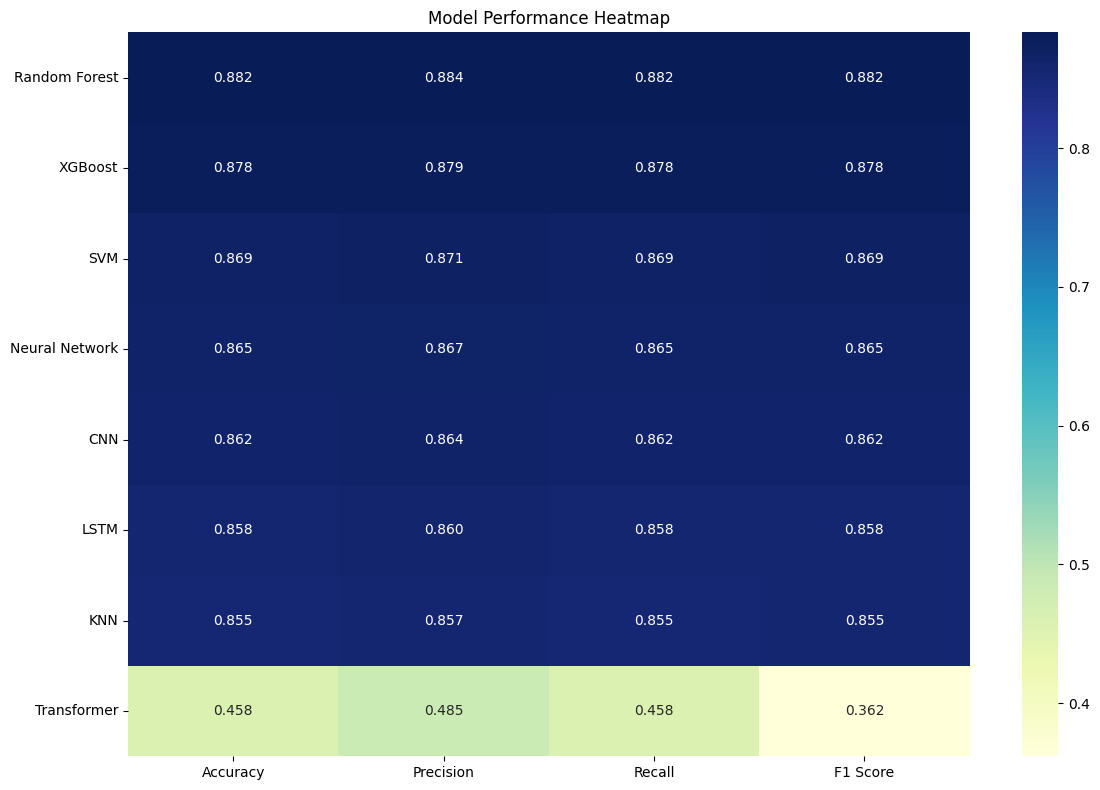

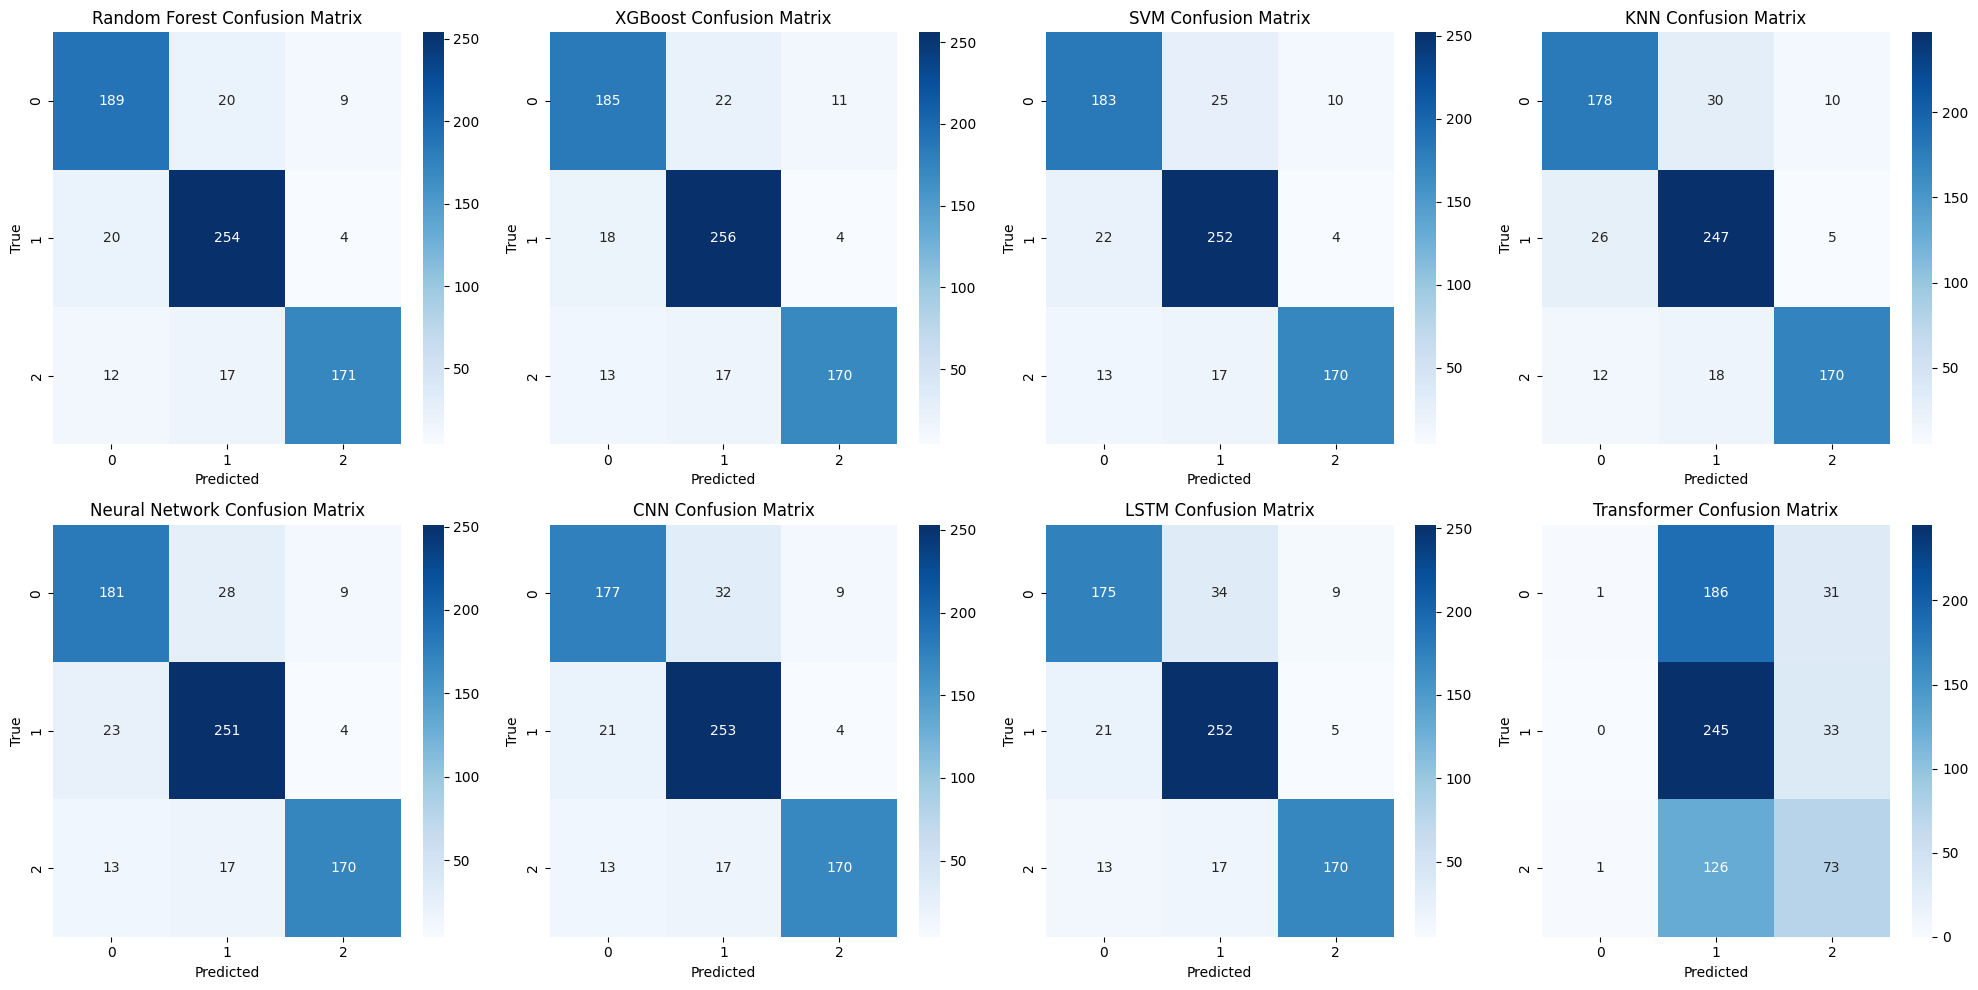

KeyError: 'neural_network_model'

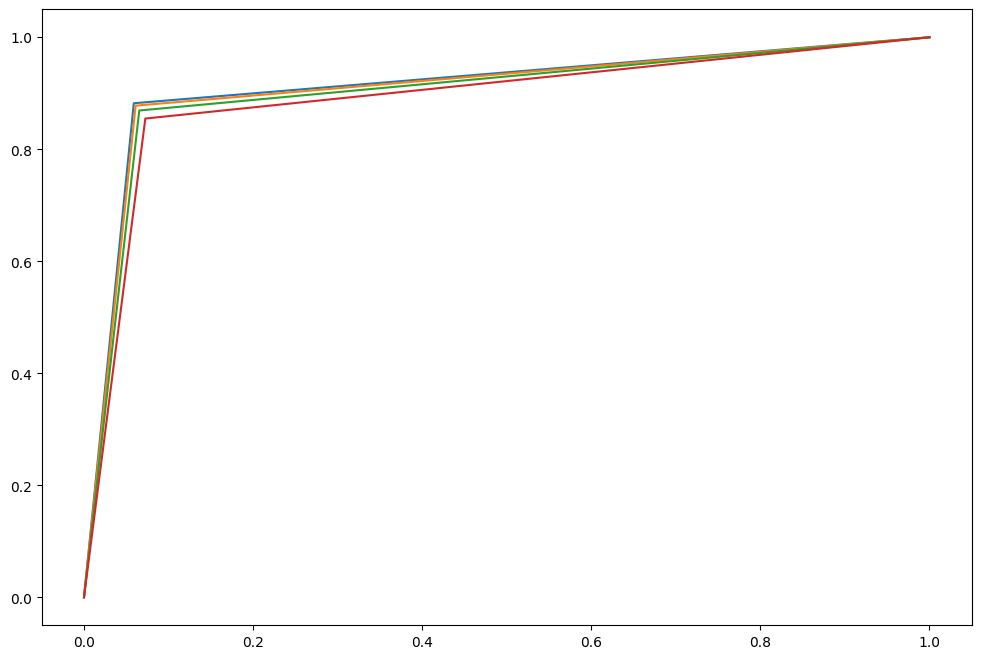

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Function to compute all metrics
def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

# Compute metrics for all models
metrics = {}
for model_name, predictions in models.items():
    metrics[model_name] = compute_metrics(y_test, predictions)

# Create a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)

# Print the table
print("Model Performance Comparison:")
print(metrics_df.to_string())

# Visualizations

# 1. Bar plot of accuracies
plt.figure(figsize=(12, 6))
metrics_df['Accuracy'].plot(kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap of all metrics
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Model Performance Heatmap')
plt.tight_layout()
plt.show()

# 3. Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, (model_name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# 4. ROC Curves (for multi-class, we'll use One-vs-Rest)
plt.figure(figsize=(12, 8))

for model_name, predictions in models.items():
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Probability predictions for deep learning models
    if model_name in ["Neural Network", "CNN", "LSTM", "Transformer"]:
        y_score = globals()[f"{model_name.lower().replace(' ', '_')}_model"].predict(X_test_scaled if model_name == "Neural Network" else X_test_reshaped)
    else:
        y_score = label_binarize(predictions, classes=np.unique(y_test))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Precision-Recall Curve
plt.figure(figsize=(12, 8))

for model_name, predictions in models.items():
    if model_name in ["Neural Network", "CNN", "LSTM", "Transformer"]:
        y_score = globals()[f"{model_name.lower().replace(' ', '_')}_model"].predict(X_test_scaled if model_name == "Neural Network" else X_test_reshaped)
    else:
        y_score = label_binarize(predictions, classes=np.unique(y_test))

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

    plt.plot(recall["micro"], precision["micro"],
             label=f'{model_name} (AP = {average_precision["micro"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 6. Feature Importance (for tree-based models)
feature_importance = pd.DataFrame({
    'Random Forest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
}, index=X.columns)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 7. Learning Curves (for a selected deep learning model, e.g., Neural Network)
history = nn_model.history

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Model Complexity vs Performance (for KNN)
n_neighbors_list = list(range(1, 21))
knn_accuracies = []

for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    knn_accuracies.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, knn_accuracies, marker='o')
plt.title('KNN: Model Complexity vs Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Random Forest Results:
Accuracy: 0.8793
ROC AUC (micro): 0.9304
Average Precision (micro): 0.8729


XGBoost Results:
Accuracy: 0.8736
ROC AUC (micro): 0.9291
Average Precision (micro): 0.8742


SVM Results:
Accuracy: 0.8707
ROC AUC (micro): 0.9329
Average Precision (micro): 0.8734


KNN Results:
Accuracy: 0.8463
ROC AUC (micro): 0.9129
Average Precision (micro): 0.8256




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Results:
Accuracy: 0.8721
ROC AUC (micro): 0.9376
Average Precision (micro): 0.8836




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
CNN Results:
Accuracy: 0.8664
ROC AUC (micro): 0.9331
Average Precision (micro): 0.8675




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
LSTM Results:
Accuracy: 0.8693
ROC AUC (micro): 0.9291
Average Precision (micro): 0.8736


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Transformer Results:
Accuracy: 0.4023
ROC AUC (micro): 0.5568
Average Precision (micro): 0.3680



Comprehensive Breakdown of Model Performance:
                Accuracy  ROC AUC (micro)  Average Precision (micro)
Random Forest   0.879310         0.930430                   0.872922
XGBoost         0.873563         0.929124                   0.874174
SVM             0.870690         0.932915                   0.873435
KNN             0.846264         0.912855                   0.825609
Neural Network  0.872126         0.937605                   0.883639
CNN             0.866379         0.933111                   0.867538
LSTM            0.869253         0.929109                   0.873589
Transformer     0.402299         0.556753                   0.367957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-28-dbd237417631>:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['Accuracy'], ax=ax[0], palette="viridis")
<ipython-input-28-dbd237417631>:239: UserWarning: FixedFormatter sh

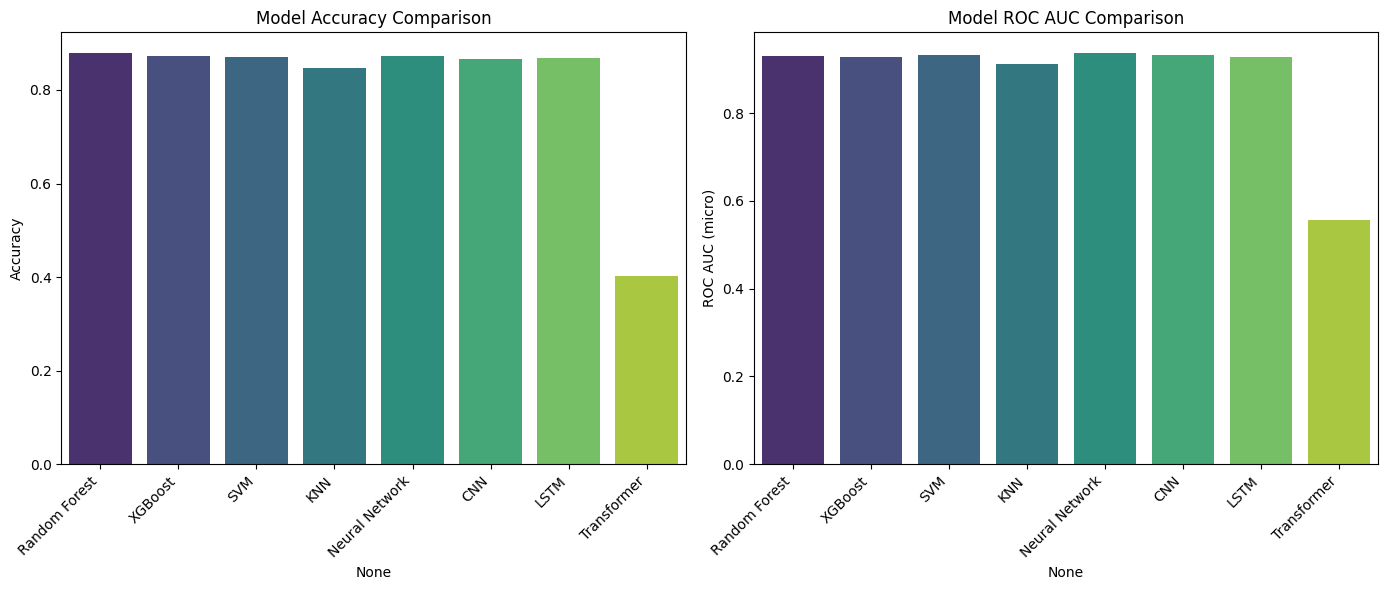

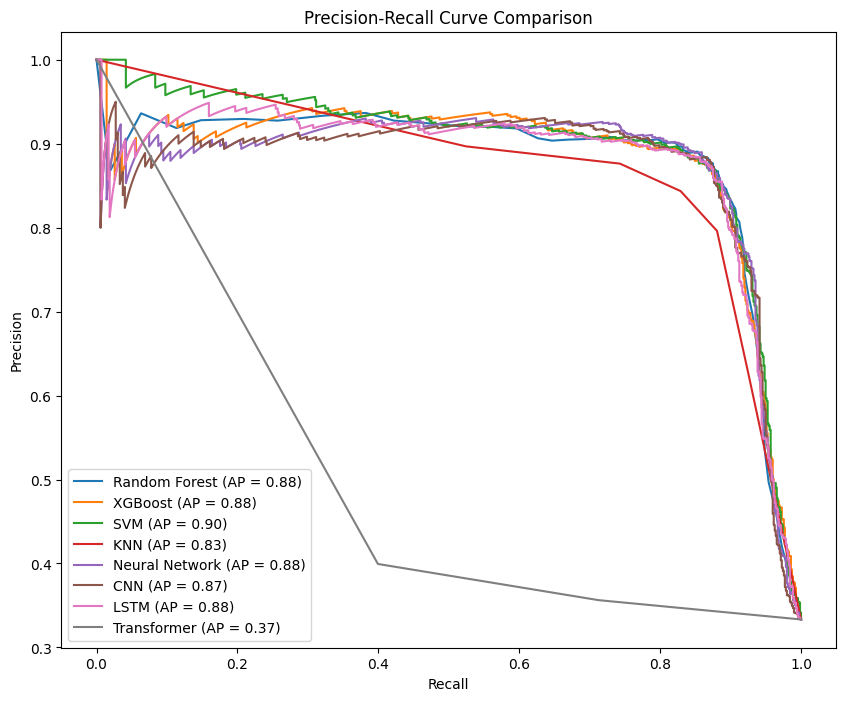

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Assume 'featured_data' is your preprocessed DataFrame

# Data Preparation
features = ['gaze_cursor_distance', 'gaze_velocity', 'time_since_last_click',
            'left_gaze_x', 'left_gaze_y', 'x_position', 'y_position']

X = featured_data[features]
y = featured_data['engagement_level']

# 1. Add random noise to features
noise_factor = 0.1
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# 2. Introduce some missing values
mask = np.random.random(X_noisy.shape) < 0.05  # 5% of data will be missing
X_noisy[mask] = np.nan

# 3. Add irrelevant features
X_noisy['random_feature1'] = np.random.randn(X_noisy.shape[0])
X_noisy['random_feature2'] = np.random.randn(X_noisy.shape[0])

# 4. Introduce label noise
label_noise_factor = 0.1
random_labels = np.random.choice(y.unique(), size=int(label_noise_factor * len(y)))
random_indices = np.random.choice(len(y), size=int(label_noise_factor * len(y)), replace=False)
y_noisy = y.copy()
y_noisy.iloc[random_indices] = random_labels

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_noisy)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_encoded, test_size=0.2, random_state=42)

# 5. Handle missing values after split to avoid data leakage
X_train_imputed = X_train.fillna(X_train.mean())
X_test_imputed = X_test.fillna(X_train.mean())  # Use train mean for test set

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert labels to categorical for deep learning models
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Reshape input for CNN and LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Function to compute metrics for multiclass classification
def compute_metrics(y_true, y_pred, y_pred_prob):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification Report
    class_report = classification_report(y_true, y_pred, target_names=le.classes_, output_dict=True)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # ROC AUC
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    n_classes = y_true_bin.shape[1]

    roc_auc = {}
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr, tpr)

    # Micro-average ROC AUC
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr, tpr)

    # Precision-Recall AUC
    precision = {}
    recall = {}
    average_precision = {}
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_prob[:, i])
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_pred_prob[:, i])

    # Micro-average Precision-Recall AUC
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_bin.ravel(), y_pred_prob.ravel())
    average_precision["micro"] = average_precision_score(y_true_bin, y_pred_prob, average="micro")

    return {
        'Accuracy': accuracy,
        'ROC AUC (micro)': roc_auc["micro"],
        'Average Precision (micro)': average_precision["micro"]
    }

# Function to print results
def print_results(model_name, y_true, y_pred, y_pred_prob):
    metrics = compute_metrics(y_true, y_pred, y_pred_prob)
    print(f"{model_name} Results:")
    print("Accuracy: {:.4f}".format(metrics['Accuracy']))
    print("ROC AUC (micro): {:.4f}".format(metrics['ROC AUC (micro)']))
    print("Average Precision (micro): {:.4f}".format(metrics['Average Precision (micro)']))
    print("\n")

# Machine Learning Models

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)
print_results("Random Forest", y_test, rf_pred, rf_prob)

# 2. XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_prob = xgb_model.predict_proba(X_test_scaled)
print_results("XGBoost", y_test, xgb_pred, xgb_prob)

# 3. SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_prob = svm_model.predict_proba(X_test_scaled)
print_results("SVM", y_test, svm_pred, svm_prob)

# 4. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)
print_results("KNN", y_test, knn_pred, knn_prob)

# Deep Learning Models

# 5. Simple Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_pred_prob = nn_model.predict(X_test_scaled)
nn_pred = np.argmax(nn_pred_prob, axis=1)
print_results("Neural Network", y_test, nn_pred, nn_pred_prob)

# 6. CNN
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

cnn_pred_prob = cnn_model.predict(X_test_reshaped)
cnn_pred = np.argmax(cnn_pred_prob, axis=1)
print_results("CNN", y_test, cnn_pred, cnn_pred_prob)

# 7. LSTM
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

lstm_pred_prob = lstm_model.predict(X_test_reshaped)
lstm_pred = np.argmax(lstm_pred_prob, axis=1)
print_results("LSTM", y_test, lstm_pred, lstm_pred_prob)

# 8. Transformer
inputs = Input(shape=(X_train_reshaped.shape[1], 1))
x = MultiHeadAttention(8, 64)(inputs, inputs)
x = LayerNormalization()(x)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(y_train_cat.shape[1], activation='softmax')(x)

transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)
transformer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transformer_model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

transformer_pred_prob = transformer_model.predict(X_test_reshaped)
transformer_pred = np.argmax(transformer_pred_prob, axis=1)
print_results("Transformer", y_test, transformer_pred, transformer_pred_prob)

# Collect metrics
models_metrics = {
    'Random Forest': compute_metrics(y_test, rf_pred, rf_prob),
    'XGBoost': compute_metrics(y_test, xgb_pred, xgb_prob),
    'SVM': compute_metrics(y_test, svm_pred, svm_prob),
    'KNN': compute_metrics(y_test, knn_pred, knn_prob),
    'Neural Network': compute_metrics(y_test, nn_pred, nn_pred_prob),
    'CNN': compute_metrics(y_test, cnn_pred, cnn_pred_prob),
    'LSTM': compute_metrics(y_test, lstm_pred, lstm_pred_prob),
    'Transformer': compute_metrics(y_test, transformer_pred, transformer_pred_prob)
}

# Create DataFrame for metrics
metrics_df = pd.DataFrame(models_metrics).T
print("\nComprehensive Breakdown of Model Performance:")
print(metrics_df)

# Plot comparison of Accuracy and ROC AUC
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=metrics_df.index, y=metrics_df['Accuracy'], ax=ax[0], palette="viridis")
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x=metrics_df.index, y=metrics_df['ROC AUC (micro)'], ax=ax[1], palette="viridis")
ax[1].set_title('Model ROC AUC Comparison')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for model_name, y_pred_prob in [("Random Forest", rf_prob),
                                ("XGBoost", xgb_prob),
                                ("SVM", svm_prob),
                                ("KNN", knn_prob),
                                ("Neural Network", nn_pred_prob),
                                ("CNN", cnn_pred_prob),
                                ("LSTM", lstm_pred_prob),
                                ("Transformer", transformer_pred_prob)]:
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision_score(y_test_bin, y_pred_prob, average="micro"):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.show()
